In [1]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import io as skio
from skimage.filters import threshold_otsu
import numpy as np

In [2]:
def histogram(im):
    
    nl,nc=im.shape
    
    hist=np.zeros(256)
    
    for i in range(nl):
        for j in range(nc):
            hist[im[i][j]]=hist[im[i][j]]+1
            
    for i in range(256):
        hist[i]=hist[i]/(nc*nl)
        
    return(hist)
    
    
def otsu_thresh(im):
    
    h=histogram(im)
    
    m=0
    for i in range(256):
        m=m+i*h[i]
    
    maxt=0
    maxk=0
    
    
    for t in range(256):
        w0=0
        w1=0
        m0=0
        m1=0
        for i in range(t):
            w0=w0+h[i]
            m0=m0+i*h[i]
        if w0 > 0:
            m0=m0/w0
        
        for i in range(t,256):
            w1=w1+h[i]
            m1=m1+i*h[i]
        if w1 > 0:   
            m1=m1/w1
        
        k=w0*w1*(m0-m1)*(m0-m1)    
        
        if k > maxk:
            maxk=k
            maxt=t
            
            
    thresh=maxt
        
    return(thresh)

In [ ]:
def otsu_thresh_3(im):
    
    h=histogram(im)
    
    m=0
    for i in range(256):
        m=m+i*h[i]
    
    maxt1=0
    maxt2=0
    maxk=0
    
    
    for t1 in range(256):
        for t2 in range(256):
            w0=0
            w1=0
            w2=0

            m0=0
            m1=0
            m2=0

            for i in range(t1):
                w0=w0+h[i]
                m0=m0+i*h[i]
            if w0 > 0:
                m0=m0/w0
            
            for i in range(t1,t2):
                w1=w1+h[i]
                m1=m1+i*h[i]
            if w1 > 0:   
                m1=m1/w1

            for i in range(t1,256):
                w2=w2+h[i]
                m2=m2+i*h[i]
            if w2 > 0:   
                m2=m2/w2
            
            k=w0*w1*((m0-m1)*(m0-m1))+ w1*w2*((m1-m2)*(m1-m2))
            
            if k > maxk:
                maxk=k
                maxt1=t1
                maxt2=t2
            
                    
    return(maxt1,maxt2)

In [3]:
image = skio.imread('images/cell.tif')
thresh = threshold_otsu(image)
print(thresh)
binary = image > thresh

thresh=otsu_thresh(image)
binary = image > thresh
print(thresh)

152
153


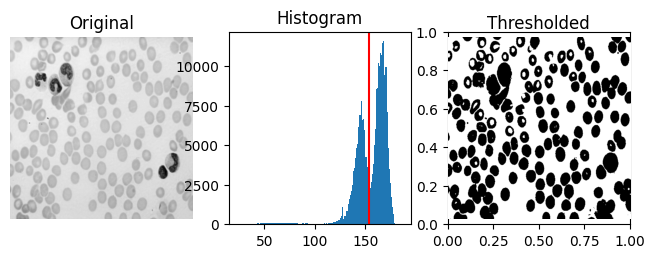

In [4]:
fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

bins=np.max(image)-np.min(image)+1

ax[1].hist(image.ravel(), bins=bins)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()